### Описание проекта
Цель проекта - анализ данных о продажах компьютерных игр интернет-магазина «Стримчик». На основе доступной из открытых источников информации о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation) необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>
Имеются данные до 2016 года. Исследование проводится в декабре 2016 г. для планирования кампании на 2017-й. <br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Предобработка данных

<div class="alert alert-info"> Импортируем все библиотеки, которые понадобядтся в ходе работы. Загружаем исходные данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-info"> Приводим названия колонок к нижнему регистру

In [2]:
data.columns = data.columns.str.lower()

In [3]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-info"> Изучаем общую информацию о таблице с исходными данными

In [4]:
display(data.info())
print('Количество дубликатов: ', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Количество дубликатов:  0


In [5]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [6]:
for c in data.columns:
    print(data[c].value_counts(dropna=False))

Need for Speed: Most Wanted                                12
Ratatouille                                                 9
Madden NFL 07                                               9
LEGO Marvel Super Heroes                                    9
FIFA 14                                                     9
                                                           ..
Final Fantasy X-2                                           1
Soccer Tsuku 2002: J-League Pro Soccer Club o Tsukurou!     1
Namco Museum Battle Collection (JP sales)                   1
Higurashi no Nakukoru ni Kizuna: Dai-Ni-Kan - Sou           1
Shin Megami Tensei: Strange Journey                         1
Name: name, Length: 11560, dtype: int64
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES  

<div class="alert alert-info"> Обрабатываем исходные данные: <br>
1. приводим данные в колонке "год выпуска" в формат даты<br>
2. в таблице с рейтингом пользователей присутствует значения tbd - это аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Исходя из этого, заменяем такие значения на NaN и меняем тип данных в этой колонке на числовой для удобства дальнейших расчётов<br>
3. в таблице присутсвуют пропуски. Для сохранения объективности имеющихся данных не будем заменять их, оставим как есть. Заменим пропуски только в столбце rating, поскольку рейтинг ESRB не является обязательным для всех стран, некоторые игрф в таблице его не имеют. Чтобы не потерять эти игры при дальнейшем анализе, заменим NaN на no_rating

In [7]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format= '%Y').dt.to_period('Y')
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float64')
data['rating'] = data['rating'].fillna('no_rating')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null period[A-DEC]
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16715 non-null object
dtypes: float64(6), object(4), period[A-DEC](1)
memory usage: 1.4+ MB


In [8]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<div class="alert alert-info"> Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [9]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


## Исследовательский анализ данных

<div class="alert alert-info">  Посмотрим, сколько игр выпускалось в разные годы

In [10]:
data_year_of_release = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
display(data_year_of_release)

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<div class="alert alert-info">   Количество выпускаемых игр росло до 2008 года, после чего начиная с 2012 показатель сократился почти в 2 раза и остаётся примерно на одном уровне <br>

<div class="alert alert-info">   Посмотрим, как менялись продажи по платформам по годам. Для этого сначала выберем платформы с максимальными суммарными продажами

In [11]:
data_sales_by_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
display(data_sales_by_platforms.sort_values('total_sales'))

,total_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,30.77


<div class="alert alert-info">  Возьмём 6 платформ с максимальными суммарными продажами и для каждой изучим объёмы продаж по годам 

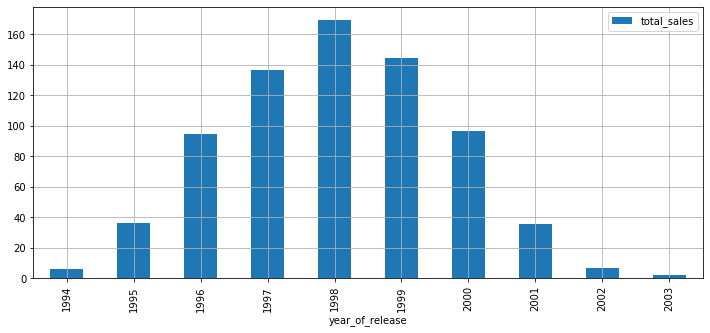

In [12]:
(data
    .query('platform == "PS"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(12,5))
)

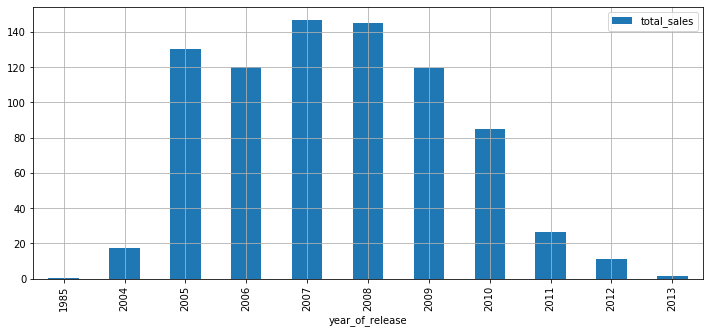

In [13]:
(data
    .query('platform == "DS"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(12,5))
)

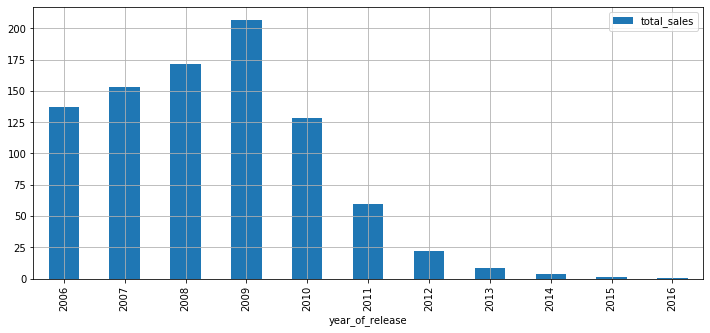

In [14]:
(data
    .query('platform == "Wii"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(12,5))
)

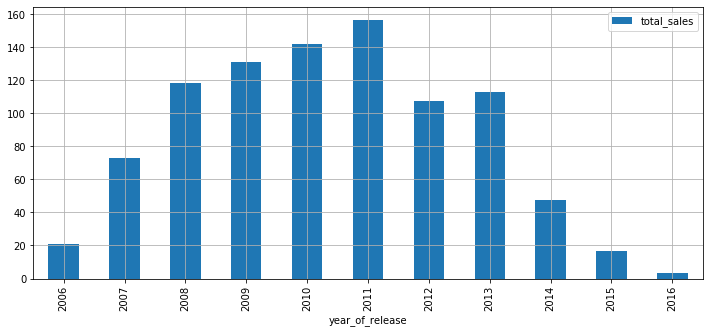

In [15]:
(data
    .query('platform == "PS3"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(12,5))
)

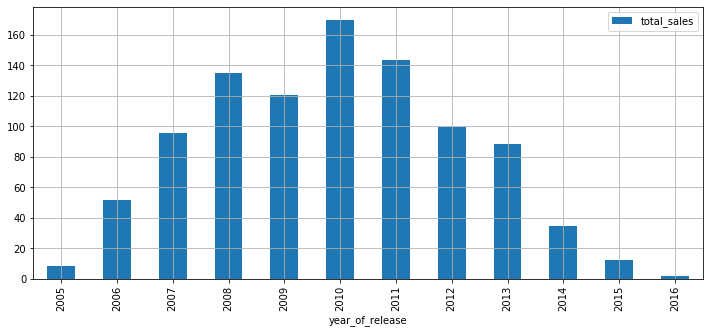

In [16]:
(data
    .query('platform == "X360"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(12,5))
)

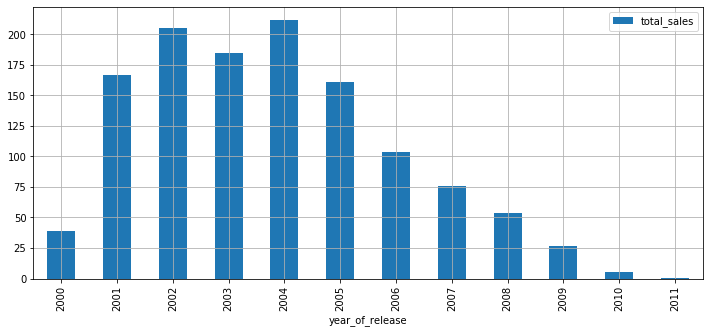

In [17]:
(data
    .query('platform == "PS2"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(12,5))
)

<div class="alert alert-info">  За какой характерный срок появляются новые и исчезают старые платформы? 9-10 лет <br>
Актуальный период, который будем использовать для прогнозирования - с 2014 года, данные за предыдущие годы в дальнейшем исследовании учитываться не будут

<div class="alert alert-info">  Далее посмотрим как распределялись продажи на разных платформах за актуальный период

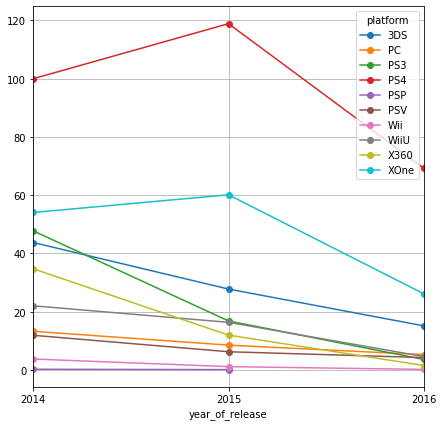

In [18]:
(data
    .query('year_of_release >= 2014')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(7,7), style='o-')
)

<div class="alert alert-info">  Явными лидерами по продажам за актуальный период являются PS4, Xone, 3DS. Продажи всех платформ снижаются

In [19]:
top_platforms = ['PS4', 'XOne', '3DS']
period = ['2014', '2015', '2016']

data_actual_period = data.query('year_of_release >= 2014')
data_actual = data.query('year_of_release >= 2014 and platform in @top_platforms')
data_actual_total_sales = data_actual.drop(data_actual.columns[[0, 3, 4, 5, 6, 7, 8, 9, 10]], axis=1)
data_actual


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,no_rating,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


<div class="alert alert-info">  Построим график «ящик с усами» по глобальным продажам игр в разбивке по 3ём наиболее популярным платформам

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


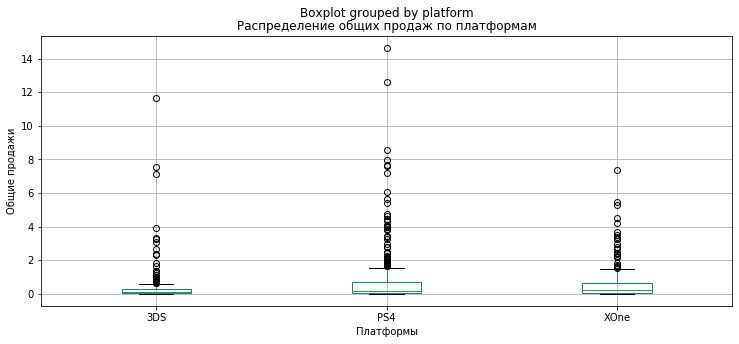

In [20]:
data_actual_total_sales.boxplot(by='platform', figsize=(12,5))
plt.title('Распределение общих продаж по платформам') 
plt.ylabel('Общие продажи')
plt.xlabel('Платформы')
plt.show()

<div class="alert alert-info">  Отсечём выбросы по оси y чтобы лучше видеть сами «ящики». Также создадим сводную таблицу с опсианием распределения значений для каждой платформы

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


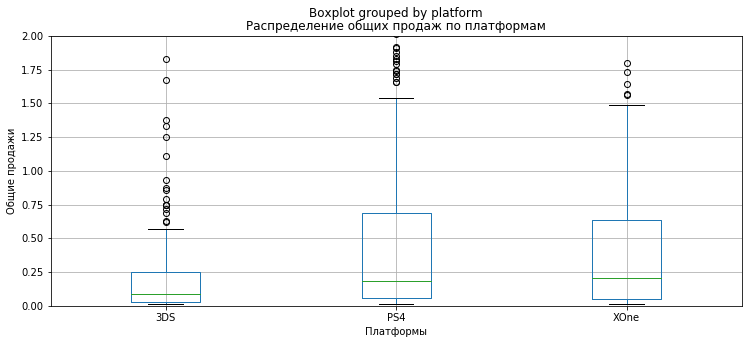

In [21]:
data_actual_total_sales.boxplot(by='platform', figsize=(12,5))
plt.title('Распределение общих продаж по платформам') 
plt.ylim(0, 2)
plt.ylabel('Общие продажи')
plt.xlabel('Платформы')
plt.show()

In [22]:
data_actual_total_sales.pivot_table(index='platform', values='total_sales', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
platform,,,,,,,,
3DS,0.0300,0.090,0.2500,212.0,11.68,0.408868,0.01,1.188368
PS4,0.0575,0.185,0.6900,376.0,14.63,0.766356,0.01,1.614969
XOne,0.0500,0.205,0.6325,228.0,7.39,0.615614,0.01,1.046513


<div class="alert alert-info">  Наибольшее медианное значение и стандартное отклонение продаж - на платформе PS4.

<div class="alert alert-info">  Для каждой из 3ёх популярноых платформ посмотрим, как влияют на продажи отзывы пользователей и критиков

,user_score,critic_score,total_sales
user_score,1.000000,0.862485,0.215193
critic_score,0.862485,1.000000,0.314117
total_sales,0.215193,0.314117,1.000000


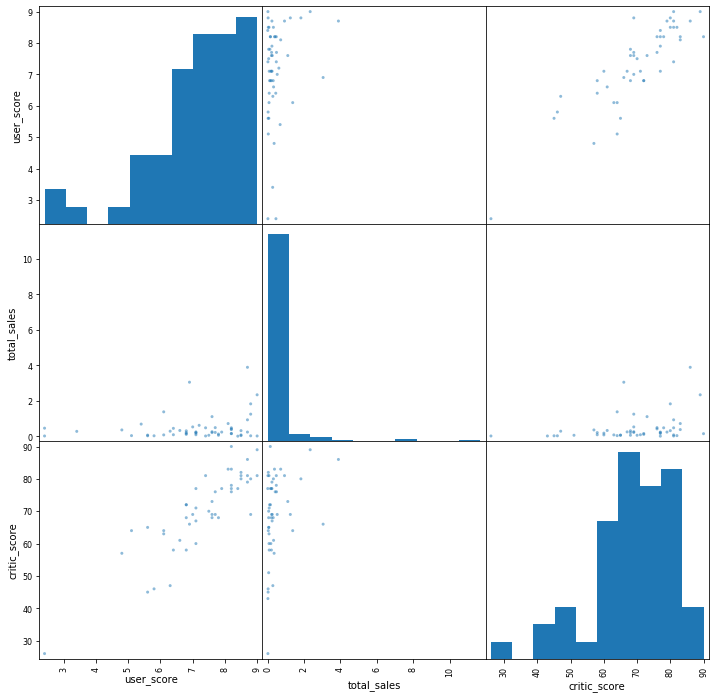

In [23]:
pd.plotting.scatter_matrix(data_actual.query('platform == "3DS"')[['user_score', 'total_sales', 'critic_score']], figsize=(12, 12))
data_actual.query('platform == "3DS"')[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.546434,-0.040132
critic_score,0.546434,1.000000,0.402661
total_sales,-0.040132,0.402661,1.000000


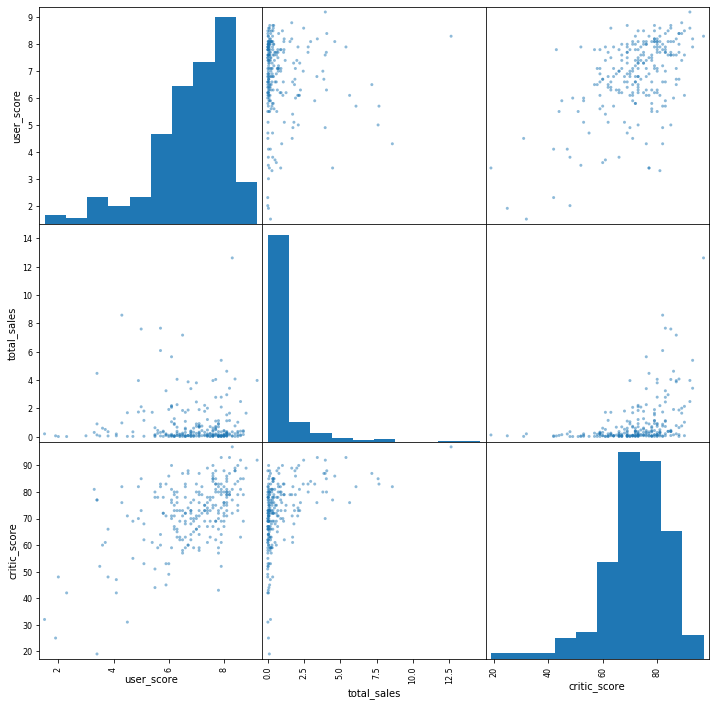

In [24]:
pd.plotting.scatter_matrix(data_actual.query('platform == "PS4"')[['user_score', 'total_sales', 'critic_score']], figsize=(12, 12))
data_actual.query('platform == "PS4"')[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.440977,-0.070384
critic_score,0.440977,1.000000,0.428677
total_sales,-0.070384,0.428677,1.000000


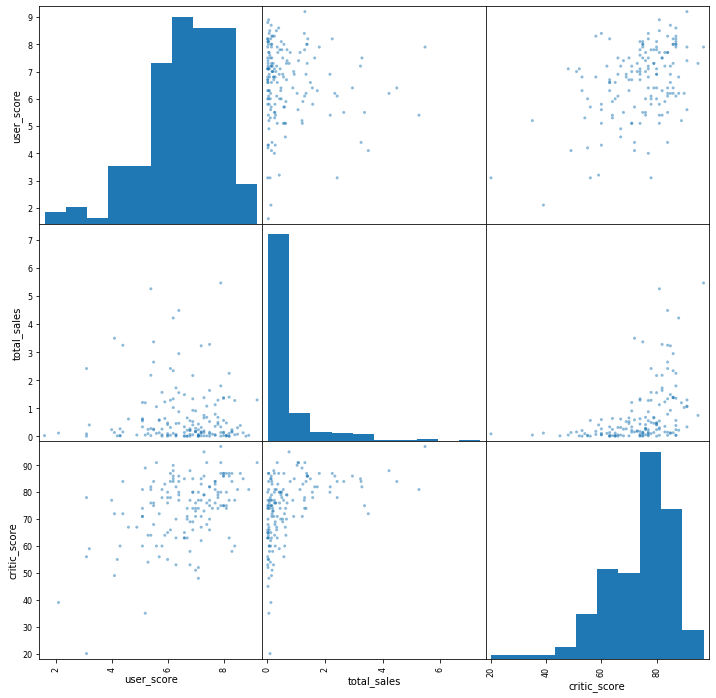

In [25]:
pd.plotting.scatter_matrix(data_actual.query('platform == "XOne"')[['user_score', 'total_sales', 'critic_score']], figsize=(12, 12))
data_actual.query('platform == "XOne"')[['user_score', 'critic_score', 'total_sales']].corr()

<div class="alert alert-info">  На продажи игр на популярных платформах отзывы критиков и пользователей влияют по-разному: <br>
    1. для 3DS продажи зависят от отзывов, при этом отзывы критиков влияют сильнее, чем отзывы пользователей<br>
    2. для PS4 отзывы пользователей не влияют на продажи, тогда как отзывы критиков влияют, но связь не очень сильна<br>
    3. для XOne картина такая же, как для PS4<br>
    В целом коэффициент корреляции отзывов критиков и общих продаж для всех платформ примерно одинаков (0.3-0.4), т.е. чем выше отзывы, тем выше продажи, хотя эта связь выражена не явно. При этом на продажи на платформе 3DS также влияют отзывы пользователей, хоть и чуть меньше, чем отзывы критиков. Для двух других платформ отзывы пользователей не влияют на продажи.

<div class="alert alert-info">  Посмотрим на общее распределение игр по жанрам. Чтобы выбросы не влияли на общуюу картину, возьмём медианные значения продаж для каждого жанра

In [26]:
data_sales_by_genre = data_actual_period.pivot_table(index='genre', values='total_sales', aggfunc='mean').round(1)
display(data_sales_by_genre.sort_values('total_sales', ascending=False))

,total_sales
genre,
Shooter,1.3
Sports,0.7
Fighting,0.5
Platform,0.5
Role-Playing,0.5
Racing,0.4
Action,0.3
Misc,0.3
Simulation,0.3


<div class="alert alert-info"> Наиболее прибыльными за актуальный период можно считать игры жанров Shooter и Sports. Наименее прибыльными - Adventure и Strategy.

### Вывод 
По предоставленным данным за период с  1980 по 2016 годы количество выпускаемых игр росло до 2008 года, достигнув максимума в 1,4 млрд копий, после чего начиная с 2012 показатель сократился почти в 2 раза и остаётся примерно на одном уровне (около 600 млн). <br>
Характерный срок "жизни" платформ -  9-10 лет <br>
Актуальный период, который будем использовать для прогнозирования - с 2014 года, данные за предыдущие годы в дальнейшем исследовании учитываться не будут<br>
Явными лидерами по продажам за актуальный период являются PS4, Xone, 3DS. Продажи всех платформ снижаются<br>
Наибольшее медианное значение и стандартное отклонение продаж - на платформе PS4.<br>
На продажи игр на популярных платформах отзывы критиков и пользователей влияют по-разному: <br>
    1. для 3DS продажи зависят от отзывов, при этом отзывы критиков влияют сильнее, чем отзывы пользователей<br>
    2. для PS4 отзывы пользователей не влияют на продажи, тогда как отзывы критиков влияют, но связь не очень сильна<br>
    3. для XOne картина такая же, как для PS4<br>
    В целом коэффициент корреляции отзывов критиков и общих продаж для всех платформ примерно одинаков (0.3-0.4), т.е. чем выше отзывы, тем выше продажи, хотя эта связь выражена не явно. При этом на продажи на платформе 3DS также влияют отзывы пользователей, хоть и чуть меньше, чем отзывы критиков. Для двух других платформ отзывы пользователей не влияют на продажи.<br>
Наиболее прибыльными за актуальный период можно считать игры жанров Shooter и Sports. Наименее прибыльными - Adventure и Strategy.

## Портрет пользователя каждого региона

<div class="alert alert-info"> Определяем самые популярные платформы (топ-5) для каждого региона
</div>

In [27]:
data_sales_na_platforms = data_actual_period.pivot_table(index='platform', values='na_sales', aggfunc='sum')
data_sales_na_platforms.columns = ['Продажи в Северной Америке, млн копий']
data_sales_na_platforms['доля, %'] = ((data_sales_na_platforms['Продажи в Северной Америке, млн копий']/data_sales_na_platforms['Продажи в Северной Америке, млн копий'].sum())*100).round(1)
display(data_sales_na_platforms.sort_values('Продажи в Северной Америке, млн копий', ascending=False).head())

,"Продажи в Северной Америке, млн копий","доля, %"
platform,,
PS4,98.61,34.7
XOne,81.27,28.6
X360,28.30,10.0
3DS,22.64,8.0
PS3,22.05,7.8


In [28]:
data_sales_jp_platforms = data_actual_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
data_sales_jp_platforms.columns = ['Продажи в Японии, млн копий']
data_sales_jp_platforms['доля, %'] = ((data_sales_jp_platforms['Продажи в Японии, млн копий']/data_sales_jp_platforms['Продажи в Японии, млн копий'].sum())*100).round(1)
display(data_sales_jp_platforms.sort_values('Продажи в Японии, млн копий', ascending=False).head())

,"Продажи в Японии, млн копий","доля, %"
platform,,
3DS,44.24,47.5
PS4,15.02,16.1
PSV,14.54,15.6
PS3,11.22,12.1
WiiU,7.31,7.9


In [29]:
data_sales_eu_platforms = data_actual_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
data_sales_eu_platforms.columns = ['Продажи в Европе, млн копий']
data_sales_eu_platforms['доля, %'] = ((data_sales_eu_platforms['Продажи в Европе, млн копий']/data_sales_eu_platforms['Продажи в Европе, млн копий'].sum())*100).round(1)
display(data_sales_eu_platforms.sort_values('Продажи в Европе, млн копий', ascending=False).head())

,"Продажи в Европе, млн копий","доля, %"
platform,,
PS4,130.04,48.0
XOne,46.25,17.1
PS3,25.54,9.4
PC,17.97,6.6
3DS,16.12,6.0


<div class="alert alert-info"> топ-5 популярных платформ по регионам и их доля от общих продаж:<br><br>
    Северная Америка:<br>
    PS4 - 34.7% <br>
    XOne - 28.6%<br>
    X360 - 10.0%<br>
    3DS - 8.0%<br>
    PS3 - 7.8%<br><br>
    Япония:<br>
    3DS - 47.5%<br>
    PS4 - 16.1%<br>
    PSV - 15.6%<br>
    PS3 - 12.1%<br>
    WiiU - 7.9%<br><br>
    Европа:<br>
    PS4 - 48.0%<br>
    XOne - 17.1%<br>
    PS3 - 9.4%<br>
    PC - 6.6%<br>
    3DS - 6.9%<br>
</div>

<div class="alert alert-info"> Определяем самые популярные жанры (топ-5)  для каждого региона. Чтобы выбросы не влияли на общуюу картину, возьмём медианные значения продаж для каждого жанра
</div>

In [30]:
data_genre_na = data_actual_period.pivot_table(index='genre', values='na_sales', aggfunc='mean').round(2)
data_genre_na.columns = ['Медиана продаж в Северной Америке, млн копий']
display(data_genre_na.sort_values('Медиана продаж в Северной Америке, млн копий', ascending=False).head())

,"Медиана продаж в Северной Америке, млн копий"
genre,
Shooter,0.62
Sports,0.29
Fighting,0.21
Platform,0.18
Role-Playing,0.15


In [31]:
data_genre_jp = data_actual_period.pivot_table(index='genre', values='jp_sales', aggfunc='mean').round(2)
data_genre_jp.columns = ['Медиана продаж в Японии, млн копий']
display(data_genre_jp.sort_values('Медиана продаж в Японии, млн копий', ascending=False).head())

,"Медиана продаж в Японии, млн копий"
genre,
Role-Playing,0.14
Fighting,0.11
Platform,0.07
Puzzle,0.07
Action,0.05


In [32]:
data_genre_eu = data_actual_period.pivot_table(index='genre', values='eu_sales', aggfunc='mean').round(2)
data_genre_eu.columns = ['Медиана продаж в Европе, млн копий']
display(data_genre_eu.sort_values('Медиана продаж в Европе, млн копий', ascending=False).head())

,"Медиана продаж в Европе, млн копий"
genre,
Shooter,0.51
Sports,0.28
Racing,0.20
Platform,0.18
Simulation,0.17


<div class="alert alert-info"> Наиболее популярный жанр игр (с ощутимым отрывом от других) в Северной Америке и Европе  - Shooter. На втором месте в обоих регионах жанр Sports. При этом в Японии оба этих жанра не входят в топ-5, там наиболее популярны Role-Playing, Fighting, Platform, Puzzle и Action.<br>
В Северной Америке в топ-5 по поулярности входят также Fighting, Platform и Role-Playing.<br>
В Европе: Racing, Platform и Simulation.
</div>

<div class="alert alert-info"> Влияет ли рейтинг ESRB на продажи в отдельном регионе?<br><br>
    
Рейтинг ESRB: <br>
«E» («Everyone») — «Для всех»<br>
«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»<br>
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше<br>
«M» («Mature») — «От 17 лет»<br>
</div>

In [33]:
data_rating = data_actual_period.pivot_table(index='rating', values=['eu_sales', 'na_sales', 'jp_sales'], aggfunc='sum')
data_rating.columns = ['Продажи в Европе, млн копий', 'Продажи в Северной Америке, млн копий', 'Продажи в Японии, млн копий']
display(data_rating)

,"Продажи в Европе, млн копий","Продажи в Северной Америке, млн копий","Продажи в Японии, млн копий"
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
no_rating,58.95,56.90,64.72


<div class="alert alert-info">  Влияние рейтинга ESRB на продажи в регионах:<br>
В Европе наиболее продаваемыми являются игры для взрослых.<br>
В Северной Америке - игры без рейтинга и игры для подростков.<br>
В Европе наиболее продаваемыми являются игры для взрослых.<br>
</div>

### Вывод
Составим портрет пользователя для 3ёх регионов: Северная Америка, Япония и Европа.<br>
топ-5 популярных платформ по регионам и их доля от общих продаж:<br><br>
    Северная Америка:<br>
    PS4 - 34.7% <br>
    XOne - 28.6%<br>
    X360 - 10.0%<br>
    3DS - 8.0%<br>
    PS3 - 7.8%<br><br>
    Япония:<br>
    3DS - 47.5%<br>
    PS4 - 16.1%<br>
    PSV - 15.6%<br>
    PS3 - 12.1%<br>
    WiiU - 7.9%<br><br>
    Европа:<br>
    PS4 - 48.0%<br>
    XOne - 17.1%<br>
    PS3 - 9.4%<br>
    PC - 6.6%<br>
    3DS - 6.9%<br><br>
Наиболее популярный жанр игр (с ощутимым отрывом от других) в Северной Америке и Европе  - Shooter. На втором месте в обоих регионах жанр Sports. При этом в Японии оба этих жанра не входят в топ-5, там наиболее популярны Role-Playing, Fighting, Platform, Puzzle и Action.<br>
В Северной Америке в топ-5 по поулярности входят также Fighting, Platform и Role-Playing.<br>
В Европе: Racing, Platform и Simulation.<br><br>
Влияние рейтинга ESRB на продажи в регионах:<br>
В Европе наиболее продаваемыми являются игры для взрослых.<br>
В Северной Америке - игры без рейтинга и игры для подростков.<br>
В Европе наиболее продаваемыми являются игры для взрослых.<br>

## Проверка гипотез

<div class="alert alert-info"> Далее проверяем 2 гипотезы. Первая нулевая гипотеза звучит так: средние пользовательские рейтинги платформ Xbox One и PC равны. Альтерантивная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны

In [34]:
print('Дисперсия средних пользовательских рейтингов платформы Xbox One: ', np.var(data_actual_period.query('platform == "XOne" and user_score != "NaN"')[['user_score']]))
print('Дисперсия средних пользовательских рейтингов платформы PC: ', np.var(data_actual_period.query('platform == "PC" and user_score != "NaN"')[['user_score']]))

Дисперсия средних пользовательских рейтингов платформы Xbox One:  user_score    1.879546
dtype: float64
Дисперсия средних пользовательских рейтингов платформы PC:  user_score    2.877374
dtype: float64


<div class="alert alert-info"> Дисперсии не равны, поэтому при расчёте будем использовать equal_var = False. Далее проверяем гипотезу о равенстве средних двух независимых совокупностей:
</div>

In [35]:
alpha = .05

results = st.ttest_ind(
    data_actual_period.query('platform == "XOne" and user_score != "NaN"')[['user_score']], 
    data_actual_period.query('platform == "PC"  and user_score != "NaN"')[['user_score']],
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.11601398]
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">
Вторая нулевая гипотеза, которую будем проверять: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны. Альтернативная гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны

In [36]:
print('Дисперсия средних пользовательских рейтингов платформы Xbox One: ', np.var(data_actual_period.query('genre == "Action" and user_score != "NaN"')[['user_score']]))
print('Дисперсия средних пользовательских рейтингов платформы PC: ', np.var(data_actual_period.query('genre == "Sports" and user_score != "NaN"')[['user_score']]))

Дисперсия средних пользовательских рейтингов платформы Xbox One:  user_score    1.892084
dtype: float64
Дисперсия средних пользовательских рейтингов платформы PC:  user_score    3.419838
dtype: float64


<div class="alert alert-info"> Дисперсии не равны, поэтому при расчёте будем использовать equal_var = False. Далее проверяем гипотезу о равенстве средних двух независимых совокупностей:
</div>

In [37]:
alpha = .05

results = st.ttest_ind(
    data_actual_period.query('genre == "Action" and user_score != "NaN"')[['user_score']], 
    data_actual_period.query('genre == "Sports" and user_score != "NaN"')[['user_score']],
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [1.18255504e-14]
Отвергаем нулевую гипотезу


### Вывод
Результаты проверки гипотез:<br>
1 гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны - не была отвергнута.<br>
2 гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны - отвергнута.

# Общий вывод
По предоставленным данным за период с  1980 по 2016 годы количество выпускаемых игр росло до 2008 года, достигнув максимума в 1,4 млрд копий, после чего начиная с 2012 показатель сократился почти в 2 раза и остаётся примерно на одном уровне (около 600 млн). <br>
Характерный срок "жизни" платформ -  9-10 лет <br>
Актуальный период, который будем использовать для прогнозирования - с 2014 года, данные за предыдущие годы в дальнейшем исследовании учитываться не будут<br>
Явными лидерами по продажам за актуальный период являются PS4, Xone, 3DS. Продажи всех платформ снижаются<br>
Наибольшее медианное значение и стандартное отклонение продаж - на платформе PS4.<br>
На продажи игр на популярных платформах отзывы критиков и пользователей влияют по-разному: <br>
    1. для 3DS продажи зависят от отзывов, при этом отзывы критиков влияют сильнее, чем отзывы пользователей<br>
    2. для PS4 отзывы пользователей не влияют на продажи, тогда как отзывы критиков влияют, но связь не очень сильна<br>
    3. для XOne картина такая же, как для PS4<br>
    В целом коэффициент корреляции отзывов критиков и общих продаж для всех платформ примерно одинаков (0.3-0.4), т.е. чем выше отзывы, тем выше продажи, хотя эта связь выражена не явно. При этом на продажи на платформе 3DS также влияют отзывы пользователей, хоть и чуть меньше, чем отзывы критиков. Для двух других платформ отзывы пользователей не влияют на продажи.<br>
Наиболее прибыльными за актуальный период можно считать игры жанров Shooter и Sports. Наименее прибыльными - Adventure и Strategy.<br><br>
Портрет пользователя трёх регионов (Северная Америка, Япония и Европа) за актуальный период выглядит следующим образом<br>
топ-5 популярных платформ по регионам и их доля от общих продаж:<br><br>
    Северная Америка:<br>
    PS4 - 34.7% <br>
    XOne - 28.6%<br>
    X360 - 10.0%<br>
    3DS - 8.0%<br>
    PS3 - 7.8%<br><br>
    Япония:<br>
    3DS - 47.5%<br>
    PS4 - 16.1%<br>
    PSV - 15.6%<br>
    PS3 - 12.1%<br>
    WiiU - 7.9%<br><br>
    Европа:<br>
    PS4 - 48.0%<br>
    XOne - 17.1%<br>
    PS3 - 9.4%<br>
    PC - 6.6%<br>
    3DS - 6.9%<br><br>
Наиболее популярный жанр игр (с ощутимым отрывом от других) в Северной Америке и Европе  - Shooter. На втором месте в обоих регионах жанр Sports. При этом в Японии оба этих жанра не входят в топ-5, там наиболее популярны Role-Playing, Fighting, Platform, Puzzle и Action.<br>
В Северной Америке в топ-5 по поулярности входят также Fighting, Platform и Role-Playing.<br>
В Европе: Racing, Platform и Simulation.<br><br>
Влияние рейтинга ESRB на продажи в регионах:<br>
В Европе наиболее продаваемыми являются игры для взрослых.<br>
В Северной Америке - игры без рейтинга и игры для подростков.<br>
В Европе наиболее продаваемыми являются игры для взрослых.<br><br>
В ходе исследования была проведена проверка двух гипотез:
<br>
1 гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны - не была отвергнута.<br>
2 гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны - отвергнута.